### Multiple Linear Regression

In [2]:
# Import packages
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
zacs_features1 = pd.read_csv("zacs_features1.csv", index_col=0)

In [37]:
zacs_features1.shape

(155724, 33)

In [5]:
# Splitting training and testing data
zacs_features1_train = zacs_features1[zacs_features1['Year'] <2018]
zacs_features1_test = zacs_features1[zacs_features1['Year'] == 2018]

In [6]:
print(zacs_features1_train.shape)   # 73% train set
print(zacs_features1_test.shape)    #27% test set

(123310, 33)
(32414, 33)


In [7]:
# X and Y of train and test datasets
zf1X_train = zacs_features1_train.drop(["RegionName", "ZORI"], axis =1)
zf1y_train = zacs_features1_train['ZORI']
zf1X_test = zacs_features1_test.drop(["RegionName", "ZORI"], axis =1)
zf1y_test = zacs_features1_test['ZORI']

In [8]:
# Creating a copy for standardization
zf1X_train_std = zf1X_train.copy()
zf1X_test_std = zf1X_test.copy()

In [9]:
# Standard Scaling of independent variables
ss = StandardScaler()
zf1X_train_std = ss.fit_transform(zf1X_train_std)
zf1X_test_std = ss.transform(zf1X_test_std)

In [10]:
# Model 11 linear regression on Standard Scaled Data
model11_ols = LinearRegression()
model11_ols.fit(zf1X_train_std, zf1y_train)

LinearRegression()

In [11]:
#Scores for train and test sets
print("R^2 for train set: %f" %model11_ols.score(zf1X_train_std, zf1y_train))

print('-'*30)

print("R^2 for test  set: %f" %model11_ols.score(zf1X_test_std, zf1y_test))

R^2 for train set: 0.829466
------------------------------
R^2 for test  set: 0.819728


In [12]:
# RMSE for model 11
np.around(mean_squared_error(zf1y_test, model11_ols.predict(zf1X_test_std), squared = False))

271.0

In [13]:
#model11_yhats = np.around(model11_ols.predict(zf1X_test_std))
#model11_yhats = pd.DataFrame(model11_yhats)

In [14]:
# Created a CSV file with actual and predicted values of Model 11
model11_pred = zacs_features1_test.copy()
model11_pred['Predicted'] = np.around(model11_ols.predict(zf1X_test_std))
model11_pred= model11[['RegionName','Year', 'ZORI', 'Predicted']]
model11_pred.to_csv("model11_pred.csv")

In [47]:
#zf1y_test.to_frame().values.flatten()

array([3085, 3086, 3087, ..., 2273, 2279, 2277])

In [60]:
#zacs_features1_test['RegionName'].to_frame().values.flatten()

array([10025, 10025, 10025, ..., 60602, 60602, 60602])

### Linear Regression after dropping high-priced rentals

In [21]:
# Taken ZORI values<6000
zf_no_outliers = zacs_features1[zacs_features1['ZORI']<6000]

In [36]:
zf_no_outliers.shape

(155615, 33)

In [38]:
# Splitting training and testing data
zf_no_outliers_train = zf_no_outliers[zf_no_outliers['Year'] <2018]
zf_no_outliers_test = zf_no_outliers[zf_no_outliers['Year'] == 2018]

In [39]:
print(zf_no_outliers_train.shape)   # 73% train set
print(zf_no_outliers_test.shape)    #27% test set

(123233, 33)
(32382, 33)


In [30]:
# X and Y of train and test datasets
zf2X_train = zf_no_outliers_train.drop(["RegionName", "ZORI"], axis =1)
zf2y_train = zf_no_outliers_train['ZORI']
zf2X_test = zf_no_outliers_test.drop(["RegionName", "ZORI"], axis =1)
zf2y_test = zf_no_outliers_test['ZORI']

In [31]:
# Creating a copy for standardization
zf2X_train_std = zf2X_train.copy()
zf2X_test_std = zf2X_test.copy()

In [32]:
# Standard Scaling of independent variables
ss = StandardScaler()
zf2X_train_std = ss.fit_transform(zf2X_train_std)
zf2X_test_std = ss.transform(zf2X_test_std)

In [33]:
# Model 12 linear regression on Standard Scaled Data
model12_ols = LinearRegression()
model12_ols.fit(zf2X_train_std, zf2y_train)

LinearRegression()

In [34]:
#Scores for train and test sets
print("R^2 for train set: %f" %model12_ols.score(zf2X_train_std, zf2y_train))

print('-'*30)

print("R^2 for test  set: %f" %model12_ols.score(zf2X_test_std, zf2y_test))

R^2 for train set: 0.841155
------------------------------
R^2 for test  set: 0.835256


In [35]:
# RMSE for model 12
np.around(mean_squared_error(zf2y_test, model12_ols.predict(zf2X_test_std), squared = False))

247.0

In [49]:
# This was done because standardization results in an array instead of datframe and thus coilumn names are lost. When we run statsmodel, we don not get to see which columns have\
# what coefficients. This was done to add back the column names so we could see it in sttsmodel.
zf2X_train_std_df = pd.DataFrame(zf2X_train_std, columns = zf2X_train.columns)

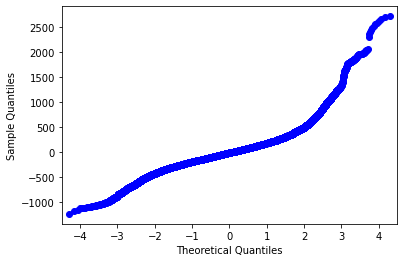

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:13:29   Log-Likelihood:            -8.4592e+05
No. Observations:              123233   AIC:                         1.692e+06
Df Residuals:                  123201   BIC:                         1.692e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [48]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
model12X_add_const = sm.add_constant(zf2X_train_std_df)
model12sm = sm.OLS(zf2y_train.values.reshape(-1,1), model12X_add_const)
fitted = model12sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

In [50]:
# I tried this for my own interest. No need to go through this section from this cell to qqplot cell.
# Also Standardizing the dependent variable
# X and Y of train and test datasets
zf2X_train = zf_no_outliers_train.drop(["RegionName", "ZORI"], axis =1)
zf2y_train = zf_no_outliers_train['ZORI']
zf2X_test = zf_no_outliers_test.drop(["RegionName", "ZORI"], axis =1)
zf2y_test = zf_no_outliers_test['ZORI']

In [52]:
# Creating a copy for standardization
zf3X_train_std = zf2X_train.copy()
zf3X_test_std = zf2X_test.copy()
zf3y_train_std = zf2y_train.copy()
zf3y_test_std = zf2y_test.copy()

In [54]:
# Standard Scaling of independent variables
ss = StandardScaler()
zf3X_train_std = ss.fit_transform(zf3X_train_std)
zf3X_test_std = ss.transform(zf3X_test_std)
zf3y_train_std = ss.fit_transform(zf3y_train_std.values.reshape(-1,1))
zf3y_test_std = ss.transform(zf3y_test_std.values.reshape(-1,1))

In [55]:
# Model 13 linear regression on Standard Scaled Data
model13_ols = LinearRegression()
model13_ols.fit(zf3X_train_std, zf3y_train_std)

LinearRegression()

In [56]:
#Scores for train and test sets
print("R^2 for train set: %f" %model13_ols.score(zf3X_train_std, zf3y_train_std))

print('-'*30)

print("R^2 for test  set: %f" %model13_ols.score(zf3X_test_std, zf3y_test_std))

R^2 for train set: 0.841155
------------------------------
R^2 for test  set: 0.835256


In [57]:
# RMSE for model 12
np.around(mean_squared_error(zf3y_test_std, model13_ols.predict(zf3X_test_std), squared = False))

0.0

In [59]:
zf3X_train_std_df = pd.DataFrame(zf3X_train_std, columns = zf2X_train.columns)

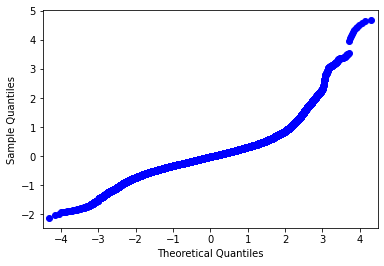

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:47:40   Log-Likelihood:                -61497.
No. Observations:              123233   AIC:                         1.231e+05
Df Residuals:                  123201   BIC:                         1.234e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [69]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
model13X_add_const = sm.add_constant(zf3X_train_std_df)
model13sm = sm.OLS(zf3y_train_std, model13X_add_const)
fitted = model13sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())